# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsa_desc = []
for i in tsa.columns:
    tsa_desc.append([i,
                     tsa[i].dtypes,
                     tsa[i].isna().sum(),
                     round((tsa[i].isna().sum())/len(tsa)*100,2),
                     tsa[i].nunique(),
                     tsa[i].drop_duplicates().sample(2).values])
pd.DataFrame(tsa_desc, columns = ['dataFeatures', 'dataType',' null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2014101417626, 2009051358570]"
1,Date Received,object,70,0.14,3522,"[15-Sep-11, 10-Mar-09]"
2,Incident Date,object,570,1.12,10788,"[9/21/2010 0:00, 11/11/2004 0:00]"
3,Airport Code,object,2052,4.02,405,"[PIH, SRQ]"
4,Airport Name,object,2052,4.02,419,"[Falls International, Pease International]"
5,Airline Name,object,8555,16.75,243,"[Jet Airways, Aerolineas Argentinas]"
6,Claim Type,object,1960,3.84,8,"[Employee Loss (MPCECA), Passenger Property Loss]"
7,Claim Site,object,190,0.37,6,"[-, Motor Vehicle]"
8,Item,object,1012,1.98,1854,"[Cameras; Clothing; Personal Electronics, Audi..."
9,Claim Amount,object,992,1.94,13248,"[$65.75 , $418.95 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
tsa.replace({'-' : np.nan}, inplace=True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [9]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [10]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 200-05-17 00:00:00

In [11]:
error_ind = []
for i in tsa.index:
    try:
        tsa['Incident Date'][i] = pd.to_datetime(tsa['Incident Date'][i])
    except:
        error_ind.append(i)

C:\Users\Asus 01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
tsa.iloc[error_ind]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [13]:
for i in error_ind:
    date = ''
    d = str(tsa['Incident Date'][i][:2])
    m = str(tsa['Incident Date'][i][3:6])
    y = str(tsa['Date Received'][i].year)
    date = d + '-' + m + '-' + y
    tsa['Incident Date'][i] = pd.to_datetime(date)

C:\Users\Asus 01\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [15]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [16]:
tsa.iloc[error_ind]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [17]:
def day_diff(df):
    diff = (df['Date Received'] - df['Incident Date']).days
    return diff

tsa['Day Differences'] = tsa[['Date Received', 'Incident Date']].apply(day_diff, axis = 1)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [18]:
tsa_drop = tsa.copy()
tsa_drop.dropna(inplace=True)

Text(0.5, 1.0, 'Day Differences Distribution')

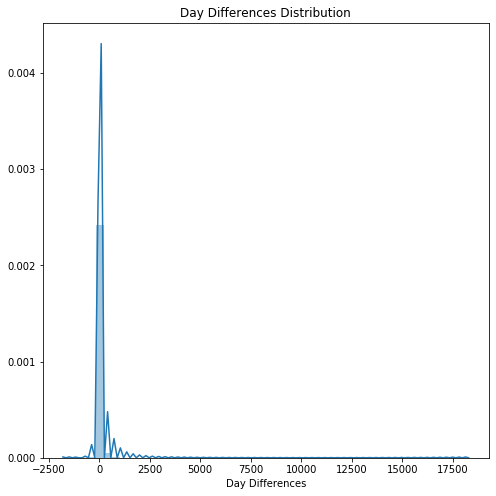

In [19]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.distplot(tsa_drop['Day Differences'])
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(tsa[tsa['Day Difference'] < 0]['Day Difference'])
plt.title('Day Differences Distribution less than 0')

KeyError: 'Day Difference'

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(tsa[tsa['Day Differences'] > 1000]['Day Difference'])
plt.title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [21]:
tsa[tsa['Day Differences']>1000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
5727,1217135M,2003-12-17,2000-01-01 00:00:00,NaN,NaN,Continental Airlines,Property Damage,Checked Baggage,Other,$190.00,Settled,$90.00,Settle,1446.0
6885,0212302M,2004-02-12,2001-02-01 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$65.00,Approved,$65.00,Approve in Full,1106.0
7257,0305106M,2004-03-05,2000-01-01 00:00:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full,1525.0
9994,2004082661422,2004-07-19,2001-05-10 00:00:00,MCN,Middle Georgia Regional Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$3;767.85,Closed as a contractor claim,$0.00,NaN,1166.0
10932,2004100464331,2004-09-09,2001-09-01 00:00:00,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0
16208,2005061086208,2005-06-01,2002-04-30 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$487.00,Settled,$243.50,Settle,1128.0
18767,2005112396390,2005-11-10,2000-11-03 00:00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,Insufficient; one of the following items requi...,NaN,NaN,1833.0
20800,2006041004307,2006-03-30,2003-03-04 00:00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),$199.99,Closed as a contractor claim,$0.00,NaN,1122.0
20981,2006042505316,2006-04-13,2003-07-16 00:00:00,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,$5;015.00,Denied,$0.00,Deny,1002.0
21876,2006062608536,2006-06-23,2003-06-07 00:00:00,COS,Colorado Springs Municipal,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$25.00,Denied,$0.00,Deny,1112.0


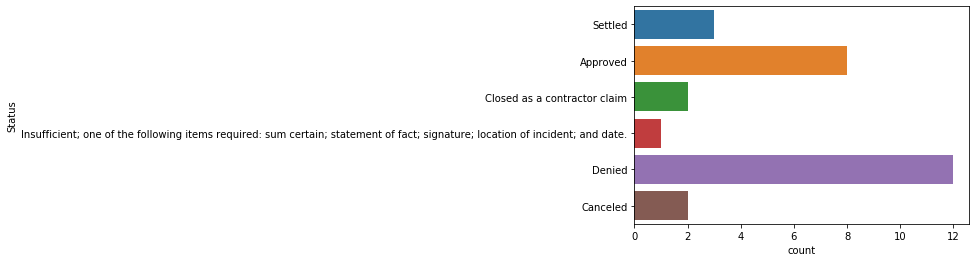

In [22]:
sns.countplot(data = tsa[tsa['Day Differences']>1000], y = 'Status')

In [23]:
tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']=='Deny')]['Claim Amount']

20981        $5;015.00 
21876           $25.00 
24272           $96.58 
24424    $1;034;650.00 
24733           $18.00 
27440        $3;540.00 
27939       $58;750.00 
28153          $100.00 
29169           $29.99 
29712          $800.00 
31283           $13.78 
36017          $249.99 
Name: Claim Amount, dtype: object

In [24]:
# The claim with > 1000 days process mostly are claimed with big amount of money
tsa[tsa['Day Differences']>1000]['Claim Amount'].value_counts()

$100.00           2
$18.00            1
$65.00            1
$190.00           1
$25.00            1
$40.00            1
$12.72            1
$30.00            1
$1;034;650.00     1
$58;750.00        1
$550.00           1
$199.99           1
$13.78            1
$29.99            1
$5;015.00         1
$1;065.09         1
$800.00           1
$3;767.85         1
$273.00           1
$249.99           1
$96.58            1
$58.25            1
$3;540.00         1
$8.48             1
$487.00           1
$32.14            1
Name: Claim Amount, dtype: int64

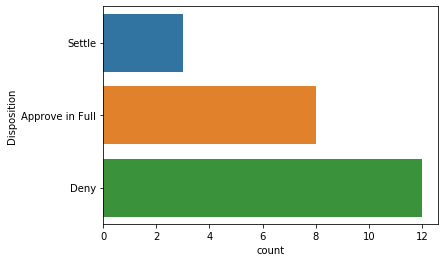

In [25]:
### The Claims with > 1000 days process are most likely to be denied
sns.countplot(data = tsa[tsa['Day Differences']>1000], y = 'Disposition')

In [26]:
tsa[tsa['Day Differences']>1000]['Item'].value_counts()

Other                                                           6
Clothing - Shoes; belts; accessories; etc.                      4
Jewelry - Fine                                                  3
Luggage (all types including footlockers)                       3
Currency                                                        2
Lighters - (cigar; cigerette; etc.); Other                      1
Medicines                                                       1
Cosmetics - Perfume; toilet articles; medicines; soaps; etc.    1
Eyeglasses - (including contact lenses)                         1
PDA - Personal Data Assistants                                  1
Audio - Other (Phonograph; cassettes; etc)                      1
Photographic Film                                               1
Sporting Equipment & Supplies                                   1
Locks                                                           1
Name: Item, dtype: int64

In [27]:
tsa[(tsa['Day Differences']>1000)][['Claim Amount','Close Amount', 'Status', 'Disposition']]

,Claim Amount,Close Amount,Status,Disposition
5727,$190.00,$90.00,Settled,Settle
6885,$65.00,$65.00,Approved,Approve in Full
7257,$40.00,$40.00,Approved,Approve in Full
9994,$3;767.85,$0.00,Closed as a contractor claim,NaN
10932,$30.00,$30.00,Approved,Approve in Full
16208,$487.00,$243.50,Settled,Settle
18767,NaN,NaN,Insufficient; one of the following items requi...,NaN
20800,$199.99,$0.00,Closed as a contractor claim,NaN
20981,$5;015.00,$0.00,Denied,Deny
21876,$25.00,$0.00,Denied,Deny


In [28]:
tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']=='Deny')][['Claim Amount', 'Status', 'Disposition','Item']]

,Claim Amount,Status,Disposition,Item
20981,$5;015.00,Denied,Deny,Jewelry - Fine
21876,$25.00,Denied,Deny,Luggage (all types including footlockers)
24272,$96.58,Denied,Deny,Other
24424,$1;034;650.00,Denied,Deny,Medicines
24733,$18.00,Denied,Deny,Cosmetics - Perfume; toilet articles; medicine...
27440,$3;540.00,Denied,Deny,Clothing - Shoes; belts; accessories; etc.
27939,$58;750.00,Denied,Deny,NaN
28153,$100.00,Denied,Deny,Currency
29169,$29.99,Denied,Deny,Other
29712,$800.00,Denied,Deny,Other


In [29]:
tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']=='Deny')]['Item'].value_counts()

Other                                                           3
Clothing - Shoes; belts; accessories; etc.                      1
Medicines                                                       1
PDA - Personal Data Assistants                                  1
Currency                                                        1
Luggage (all types including footlockers)                       1
Cosmetics - Perfume; toilet articles; medicines; soaps; etc.    1
Jewelry - Fine                                                  1
Locks                                                           1
Name: Item, dtype: int64

In [30]:
tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']!='Deny')]['Item'].value_counts()

Clothing - Shoes; belts; accessories; etc.    3
Other                                         3
Luggage (all types including footlockers)     2
Jewelry - Fine                                2
Audio - Other (Phonograph; cassettes; etc)    1
Lighters - (cigar; cigerette; etc.); Other    1
Currency                                      1
Photographic Film                             1
Eyeglasses - (including contact lenses)       1
Sporting Equipment & Supplies                 1
Name: Item, dtype: int64

In [31]:
tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']!='Deny')]['Claim Type'].value_counts()

Passenger Property Loss    8
Property Damage            6
Motor Vehicle              1
Passenger Theft            1
Name: Claim Type, dtype: int64

In [32]:
tsa[(tsa['Day Differences']>1000) & (tsa['Disposition']=='Deny')]['Claim Type'].value_counts()

Passenger Property Loss    6
Property Damage            3
Personal Injury            3
Name: Claim Type, dtype: int64

In [33]:
tsa[(tsa['Day Differences']>1000)]['Claim Site'].value_counts()

Checked Baggage    18
Checkpoint         10
Motor Vehicle       1
Other               1
Name: Claim Site, dtype: int64

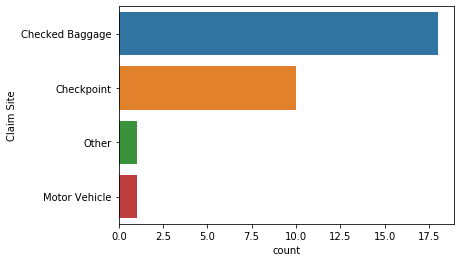

In [34]:
sns.countplot(y = tsa[(tsa['Day Differences']>1000)]['Claim Site'])

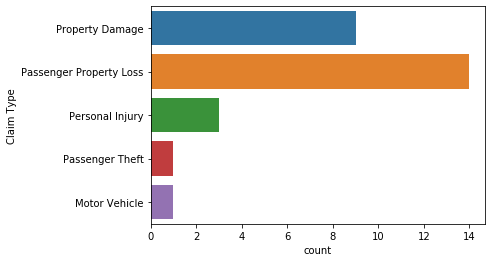

In [35]:
sns.countplot(y = tsa[(tsa['Day Differences']>1000)]['Claim Type'])

In [36]:
tsa[(tsa['Day Differences']>1000)]['Airline Name'].value_counts()

Delta Air Lines         7
UAL                     5
American Airlines       2
Northwest Airlines      2
Continental Airlines    2
Frontier Airlines       1
American Eagle          1
Jet Blue                1
Southwest Airlines      1
USAir                   1
Name: Airline Name, dtype: int64

In [37]:
tsa[(tsa['Day Differences']>1000)]['Airport Name'].value_counts()

Hartsfield-Jackson Atlanta International Airport    3
Seattle-Tacoma International                        2
John F. Kennedy International                       2
Non TSA Airport (motor vehicle)                     2
Chicago O'Hare International Airport                1
Orlando International Airport                       1
El Paso International Airport                       1
Long Island McArthur; Islip                         1
Denver International Airport                        1
Erie International                                  1
Detroit Metropolitan Wayne County Airport           1
McCarran International                              1
San Francisco International                         1
TSA - Non-Specified Airport                         1
Ronald Reagan Washington National Airport           1
Norman Y Mineta San Jose International              1
Ft. Lauderdale-Hollywood International              1
San Diego International                             1
Colorado Springs Municipal  

In [38]:
tsa[(tsa['Day Differences']>1000) & (tsa['Airline Name'] == 'Delta Air Lines')]['Claim Type'].value_counts()

Passenger Property Loss    4
Property Damage            1
Personal Injury            1
Name: Claim Type, dtype: int64

In [39]:
tsa[tsa['Day Differences']<0]['Day Differences'].value_counts()

-1.0       29
-3.0       17
-10.0      12
-2.0       11
-6.0        9
           ..
-53.0       1
-1065.0     1
-29.0       1
-665.0      1
-1037.0     1
Name: Day Differences, Length: 195, dtype: int64

In [40]:
tsa[tsa['Day Differences']==-1][['Incident Date', 'Date Received']]

,Incident Date,Date Received
7246,2004-03-02 00:00:00,2004-03-01
7775,2004-03-25 00:00:00,2004-03-24
9774,2004-07-10 00:00:00,2004-07-09
9841,2004-07-10 00:00:00,2004-07-09
35644,2009-10-16 18:00:00,2009-10-16
35991,2009-11-29 12:30:00,2009-11-29
36800,2010-04-06 12:00:00,2010-04-06
37967,2010-08-24 04:00:00,2010-08-24
38146,2010-09-13 09:00:00,2010-09-13
38341,2010-10-06 06:20:00,2010-10-06


In [41]:
same_date = []
for i in tsa[tsa['Day Differences'] == -1].index:
    if tsa['Incident Date'][i].day == tsa['Date Received'][i].day:
        same_date.append(i)

In [42]:
len(tsa[tsa['Day Differences'] == -1])

29

In [43]:
len(same_date)

25

In [44]:
tsa.iloc[same_date]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
35644,2009102264640,2009-10-16,2009-10-16 18:00:00,LGA,LaGuardia,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$301.15,Denied,$0.00,Deny,-1.0
35991,2009120466084,2009-11-29,2009-11-29 12:30:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$8.95,Approved,$8.95,Approve in Full,-1.0
36800,2010040770536,2010-04-06,2010-04-06 12:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN,-1.0
37967,2010083075446,2010-08-24,2010-08-24 04:00:00,LGA,LaGuardia,Southwest Airlines,Passenger Property Loss,Checked Baggage,Computer & Accessories,$0.00,Deny,NaN,NaN,-1.0
38146,2010092076192,2010-09-13,2010-09-13 09:00:00,ANC,Ted Stevens Anchorage International Airport,NaN,Passenger Property Loss,Checked Baggage,Food & Drink,NaN,NaN,NaN,NaN,-1.0
38341,2010101376910,2010-10-06,2010-10-06 06:20:00,BOS,Boston (Logan) International Airport,Jet Blue,Passenger Property Loss,Checkpoint,Jewelry & Watches,NaN,NaN,NaN,NaN,-1.0
38469,2010110177517,2010-10-25,2010-10-25 05:45:00,PBI,Palm Beach International,Jet Blue,Property Damage,Checked Baggage,Baggage/Cases/Purses; Clothing; Cosmetics & Gr...,$0.00,Deny,NaN,NaN,-1.0
38717,2010120378466,2010-11-24,2010-11-24 08:49:00,BUR,Bob Hope,Southwest Airlines,Property Damage,Checked Baggage,Other,$174.50,Approve in Full,NaN,NaN,-1.0
39166,2011021080111,2011-01-21,2011-01-21 16:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$0.00,Deny,NaN,NaN,-1.0
39820,2011042182835,2011-04-15,2011-04-15 20:00:00,RSW,Southwest Florida International,Sun Country Airlines Inc,Passenger Property Loss,Checked Baggage,Personal Accessories,$245.00,Settle,NaN,NaN,-1.0


In [45]:
tsa[tsa['Day Differences'] < -1]['Claim Type'].value_counts()

Passenger Property Loss    233
Property Damage            158
Employee Loss (MPCECA)       5
Passenger Theft              2
Personal Injury              1
Name: Claim Type, dtype: int64

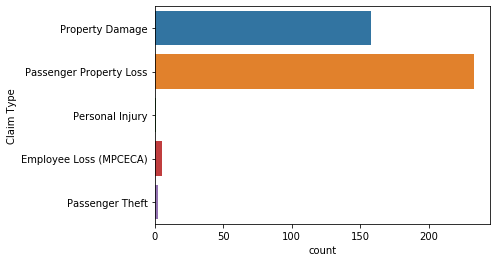

In [46]:
sns.countplot(y = tsa[tsa['Day Differences'] < -1]['Claim Type'])

In [47]:
tsa[tsa['Day Differences']<-1]['Claim Site'].value_counts()

Checked Baggage    320
Checkpoint          89
Other                2
Name: Claim Site, dtype: int64

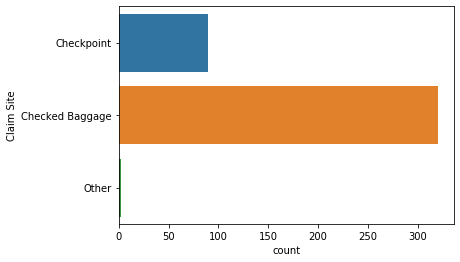

In [48]:
sns.countplot(y = tsa[tsa['Day Differences'] < -1]['Claim Site'])

In [49]:
tsa[tsa['Day Differences'] < -1]['Airline Name'].value_counts()

American Airlines                  40
UAL                                38
Delta Air Lines                    35
Continental Airlines               29
USAir                              25
Southwest Airlines                 23
Northwest Airlines                 21
AirTran Airlines                   10
Jet Blue                            8
Frontier Airlines                   7
Alaska Airlines                     6
USAir                               5
UAL                                 5
Spirit Airlines                     4
Southwest Airlines                  3
Delta Air Lines                     3
Qantus Airways                      3
Hawaiian Airlines                   3
Air France                          2
Skywest Airlines Inc USA            2
American Airlines                   2
USA 3000 (U5)                       2
America West                        2
American West                       2
Air Canada                          1
Tower Air                           1
US Express  

In [50]:
tsa[tsa['Day Differences']<-1]['Airport Name'].value_counts()

Los Angeles International Airport       21
Newark International Airport            20
Miami International Airport             18
Chicago O'Hare International Airport    17
Phoenix Sky Harbor International        16
                                        ..
Meadows Field; Bakersfield Airport       1
Joe Foss Field                           1
Long Beach                               1
Ontario International                    1
James M. Cox Dayton International        1
Name: Airport Name, Length: 111, dtype: int64

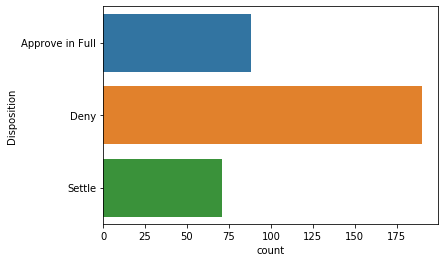

In [51]:
sns.countplot(y = tsa[tsa['Day Differences'] < -1]['Disposition'])

In [52]:
tsa[(tsa['Day Differences'] < -1)]['Claim Amount']

0           $50.00 
12         $128.05 
113        $120.00 
343      $1;254.83 
350         $49.99 
            ...    
39997    $1;518.02 
40009      $150.00 
40189       $95.00 
40190           NaN
40261           NaN
Name: Claim Amount, Length: 419, dtype: object

## Answer #1:
The claims with day difference more than 1000 days are more likely to be caused by the long process time. It might be caused by the big amount of money claimed. Big amount of claim may also cause the claim to be denied. But it also depends on what the item claimed were.

The cases with day difference more than 1000 days mostly happened at Checked Baggage - Claim Site with Passenger Property Loss - Claim Type. It might happen because the passenger just realize that their property are lost or damaged at the baggage check. It may took longer to process because the checked baggage site has many people come and go at the same time so that it's harder to data the baggage condition.

The airport which took the longest to process the claim is Hartsfield-Jackson Atlanta International Airport with 3 numbers of claims (more than 1000 days process).

The airline which took the longest to process the claim is Delta Airlines with 7 number of claims (more than 1000 days process) and the claim types are mostly passenger property loss and it makes sense for the airline to do more thorough check of the claim itself.


The Claim with day difference less than 0 days are mostly -1. The claims with -1 day differences are mostly claims that happened on the same day with the incident. (29 cases have -1 day differences but 25 out of 29 cases have same incident date and date received)

Same as the Cases with day difference more than 1000, cases with day difference less < -1 day mostly happened at Checked Baggage - Claim Site with Passenger Property Loss - Claim Type. But in this case, the data may be wrong (the incident date and date received may be switched -- human error) because there's too many things to handle at the checked baggage site.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [53]:
close = []
for i in tsa.index:
    x = str(tsa['Close Amount'][i]).replace('$','')
    y = x.replace(';', '')
    close.append(float(y))
    
tsa['Close Amount'] = close

In [54]:
claim = []
for i in tsa.index:
    x = str(tsa['Claim Amount'][i]).replace('$','')
    y = x.replace(';', '')
    claim.append(float(y))

tsa['Claim Amount'] = claim

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [55]:
def amount_diff(df):
    diff = (df['Claim Amount'] - df['Close Amount'])
    return diff

tsa['Amount Differences'] = tsa[['Claim Amount', 'Close Amount']].apply(amount_diff, axis = 1)

In [56]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,NaN


In [57]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [58]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

In [59]:
tsa_drop_2 = tsa.copy()
tsa_drop_2.dropna(inplace=True)

Text(0.5, 1.0, 'Amount Differences Distribution')

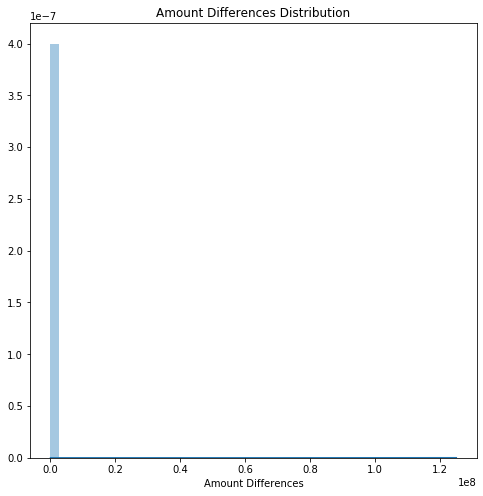

In [60]:
plt.figure(figsize=(8,8))
sns.distplot(tsa_drop_2['Amount Differences'])
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [61]:
describe = tsa['Amount Differences'].describe()
IQR = describe['75%']-describe['25%']
upper = describe['75%']+1.5*IQR
lower = describe['25%']-1.5*IQR
outlier = [i for i in tsa['Amount Differences'].dropna() if not upper>=i>=lower]
tsa[tsa['Amount Differences'].isin(outlier)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [62]:
tsa[tsa['Amount Differences'].isin(outlier)]['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [63]:
tsa[tsa['Amount Differences'].isin(outlier)]['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [64]:
not_out = tsa[~tsa['Amount Differences'].isin(outlier)]

In [65]:
out = tsa[tsa['Amount Differences'].isin(outlier)]

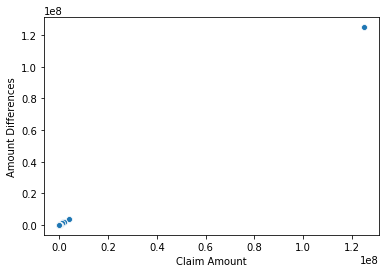

In [66]:
sns.scatterplot(data = out, x = 'Claim Amount', y = 'Amount Differences')

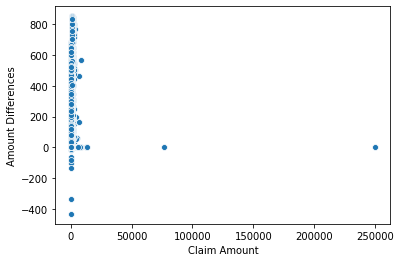

In [67]:
sns.scatterplot(data = not_out, x = 'Claim Amount', y = 'Amount Differences')

In [68]:
out[['Claim Amount', 'Amount Differences']].corr()

,Claim Amount,Amount Differences
Claim Amount,1.0,1.0
Amount Differences,1.0,1.0


In [69]:
not_out[['Claim Amount', 'Amount Differences']].corr()

,Claim Amount,Amount Differences
Claim Amount,1.000000,0.105364
Amount Differences,0.105364,1.000000


In [70]:
out[['Claim Amount', 'Amount Differences']].corr(method = 'spearman')

,Claim Amount,Amount Differences
Claim Amount,1.000000,0.958133
Amount Differences,0.958133,1.000000


In [71]:
not_out[['Claim Amount', 'Amount Differences']].corr(method = 'spearman')

,Claim Amount,Amount Differences
Claim Amount,1.000000,0.691028
Amount Differences,0.691028,1.000000


In [72]:
len(out[out['Disposition']=='Deny'])

3450

In [73]:
len(out)

4103

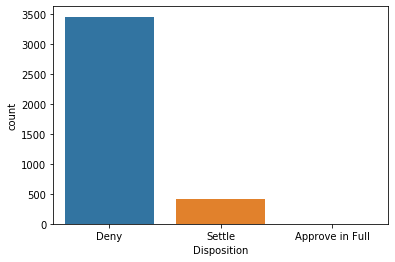

In [74]:
sns.countplot(out['Disposition'])

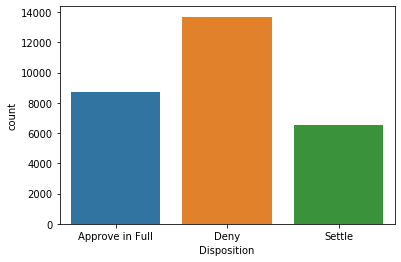

In [75]:
sns.countplot(not_out['Disposition'])

## Answer #2
I agree with your assumption that people tend to request for bigger money than what it should be. In the outlier data, we can see that the correlation between Claim Amount and Amount Differences is 1. It means that the bigger the Claim Amount, the Amount Difference also gets higher with the same number. It could happen because mostly the outlier claims are denied so that the Close Amount is 0 and the Claim Amount can be equal to Amount Differences

(Amount Differences = Claim - Close)

We can compare the outlier and not-outlier data where the not-outlier data Claim Amount and Amount Differences correlation is just 0,1. It still means that the higher the Claim Amount, the Amount Differences also get higher (positive linear correlation) but not as high as the correlation in outlier data.

The comparison between Approved and Denied claims in outlier data is so significant because mostly the claims are denied (and it maybe because the Claim Amount is so high). If we compare it to the not-outlier data, the difference between Approved and Denied claims is not as high as the outlier data.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [76]:
tsa['Claim Type'].value_counts()

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

In [77]:
tsa[tsa['Claim Type']=='Passenger Property Loss']['Airline Name'].value_counts()

Delta Air Lines                 2665
American Airlines               2646
UAL                             2072
Southwest Airlines              1955
Continental Airlines            1539
                                ... 
Air Portugal                       1
British West Indies Airlines       1
Canadian Airlines                  1
SonAir                             1
Continental Express Inc            1
Name: Airline Name, Length: 219, dtype: int64

In [78]:
tsa['Airline Name'].value_counts()

American Airlines          4377
Delta Air Lines            4371
UAL                        3507
Southwest Airlines         3258
Continental Airlines       2363
                           ... 
China Southern Airlines       1
Arika Isreali Airlines        1
Aviaco                        1
Xtra Airways                  1
XL Airways                    1
Name: Airline Name, Length: 242, dtype: int64

Text(0.5, 1.0, 'Malaysian Airline System Claim Type')

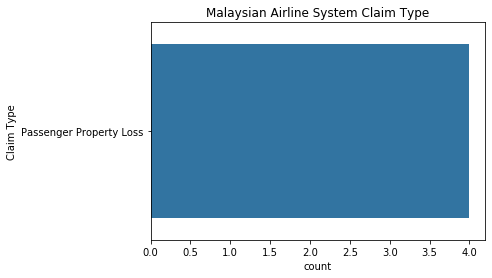

In [79]:
sns.countplot(y = tsa[tsa['Airline Name']=='Malaysian Airline System']['Claim Type'])
plt.title('Malaysian Airline System Claim Type')

Text(0.5, 1.0, 'Sun Jet International Airlines Inc Claim Type')

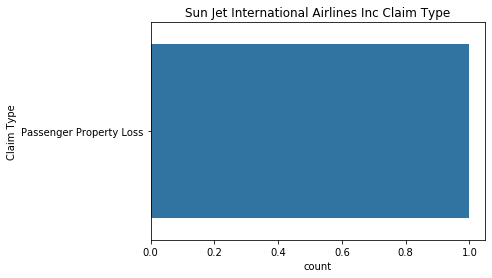

In [80]:
sns.countplot(y = tsa[tsa['Airline Name']=='Sun Jet International Airlines Inc']['Claim Type'])
plt.title('Sun Jet International Airlines Inc Claim Type')

Text(0.5, 1.0, 'Air Aruba Claim Type')

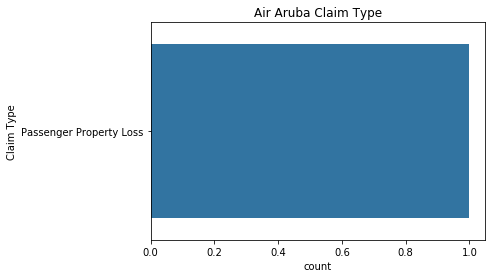

In [81]:
sns.countplot(y = tsa[tsa['Airline Name']=='Air Aruba']['Claim Type'])
plt.title('Air Aruba Claim Type')

Text(0.5, 1.0, 'American Airlines Claim Type')

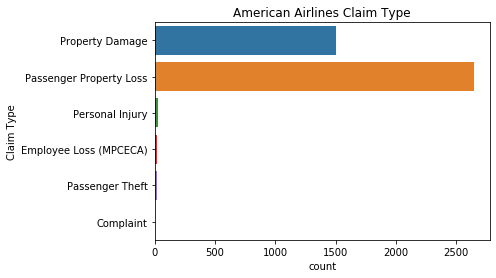

In [82]:
sns.countplot(y = tsa[tsa['Airline Name']=='American Airlines']['Claim Type'])
plt.title('American Airlines Claim Type')

Text(0.5, 1.0, 'Delta Airlines Claim Type')

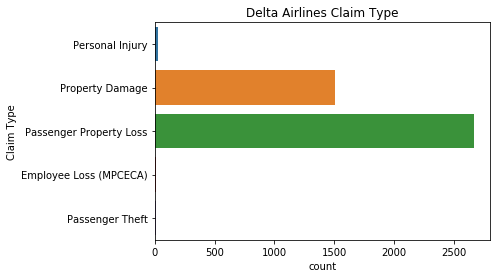

In [83]:
sns.countplot(y = tsa[tsa['Airline Name']=='Delta Air Lines']['Claim Type'])
plt.title('Delta Airlines Claim Type')

Text(0.5, 1.0, 'UAL Claim Type')

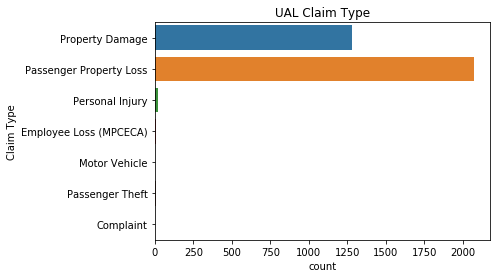

In [84]:
sns.countplot(y = tsa[tsa['Airline Name']=='UAL']['Claim Type'])
plt.title('UAL Claim Type')

Text(0.5, 1.0, 'Southwest Airlines Claim Type')

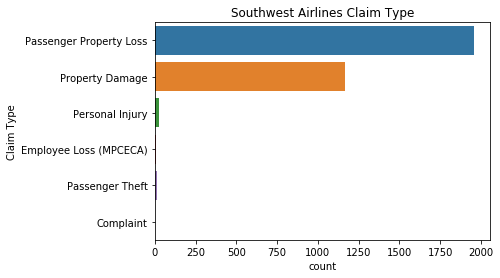

In [85]:
sns.countplot(y = tsa[tsa['Airline Name']=='Southwest Airlines']['Claim Type'])
plt.title('Southwest Airlines Claim Type')

Text(0.5, 1.0, 'Continental Airlines Claim Type')

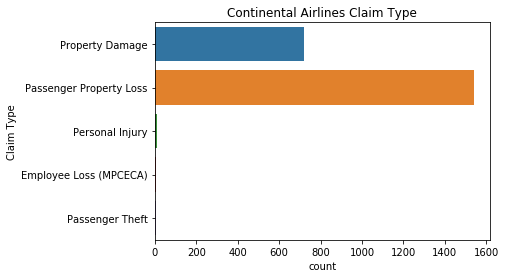

In [86]:
sns.countplot(y = tsa[tsa['Airline Name']=='Continental Airlines']['Claim Type'])
plt.title('Continental Airlines Claim Type')

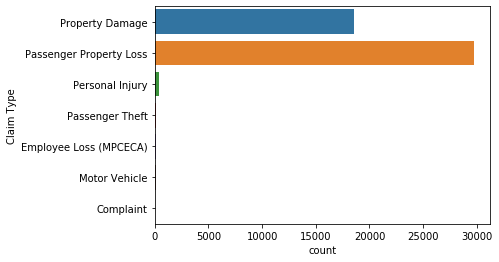

In [87]:
sns.countplot(y = tsa['Claim Type'])

In [88]:
tsa[tsa['Claim Type']=='Passenger Property Loss']['Airline Name'].value_counts()

Delta Air Lines                 2665
American Airlines               2646
UAL                             2072
Southwest Airlines              1955
Continental Airlines            1539
                                ... 
Air Portugal                       1
British West Indies Airlines       1
Canadian Airlines                  1
SonAir                             1
Continental Express Inc            1
Name: Airline Name, Length: 219, dtype: int64

In [89]:
tsa.groupby('Claim Type')['Airline Name'].count()

Claim Type
Complaint                      9
Employee Loss (MPCECA)        78
Motor Vehicle                  7
Passenger Property Loss    25664
Passenger Theft               89
Personal Injury              282
Property Damage            14313
Name: Airline Name, dtype: int64

In [90]:
tsa['Airport Name'].value_counts()

John F. Kennedy International           2286
Los Angeles International Airport       1813
Newark International Airport            1747
Chicago O'Hare International Airport    1712
Orlando International Airport           1633
                                        ... 
Middle Georgia Regional Airport            1
Charles Shulz-Sonoma County                1
Barnstable Municipal; Hyannis              1
Molokai Airport                            1
McClellan-Palomar                          1
Name: Airport Name, Length: 418, dtype: int64

In [91]:
tsa[(tsa['Airport Name']=='John F. Kennedy International')]['Claim Type'].value_counts()

Passenger Property Loss    1607
Property Damage             599
Personal Injury              16
Passenger Theft               6
Motor Vehicle                 3
Employee Loss (MPCECA)        2
Name: Claim Type, dtype: int64

Text(0.5, 1.0, 'John F. Kennedy International Claim Type')

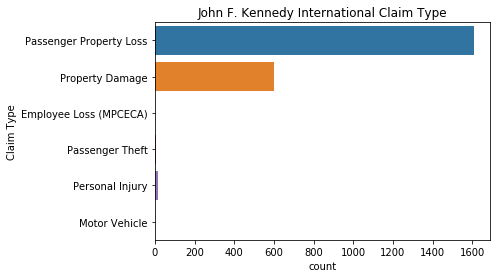

In [92]:
sns.countplot(y = tsa[tsa['Airport Name']=='John F. Kennedy International']['Claim Type'])
plt.title('John F. Kennedy International Claim Type')

Text(0.5, 1.0, 'Los Angeles International Airport Claim Type')

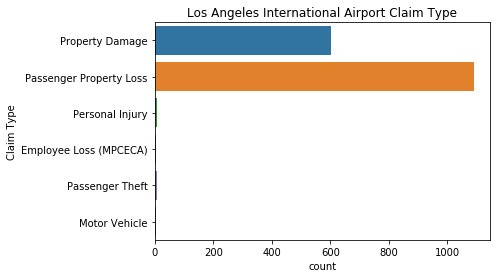

In [93]:
sns.countplot(y = tsa[tsa['Airport Name']=='Los Angeles International Airport']['Claim Type'])
plt.title('Los Angeles International Airport Claim Type')

Text(0.5, 1.0, 'Newark International Airport Claim Type')

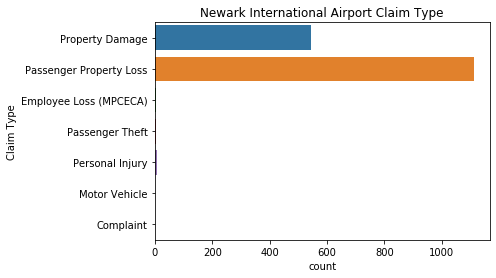

In [94]:
sns.countplot(y = tsa[tsa['Airport Name']=='Newark International Airport']['Claim Type'])
plt.title('Newark International Airport Claim Type')

Text(0.5, 1.0, 'Joplin Regional Claim Type')

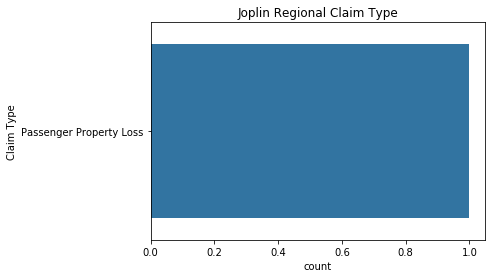

In [95]:
sns.countplot(y = tsa[tsa['Airport Name']=='Joplin Regional']['Claim Type'])
plt.title('Joplin Regional Claim Type')

Text(0.5, 1.0, 'Mercer County; Bluefield Claim Type')

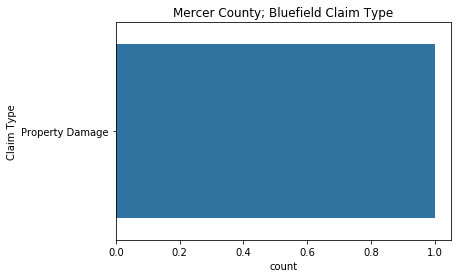

In [96]:
sns.countplot(y = tsa[tsa['Airport Name']=='Mercer County; Bluefield']['Claim Type'])
plt.title('Mercer County; Bluefield Claim Type')

Text(0.5, 1.0, 'Pease International Claim Type')

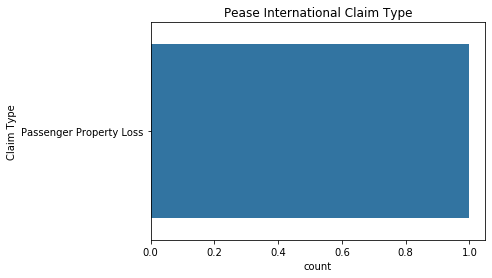

In [97]:
sns.countplot(y = tsa[tsa['Airport Name']=='Pease International']['Claim Type'])
plt.title('Pease International Claim Type')

## Answer #3-1
I belive that there is no relationship between Airline Name and Airport Name with Claim Type. The highest number of Claim Type is Passenger Property Loss.

The Airline Name with most cases is American Airline. I checked the top 5 Airline Name which have the most cases and all of them has Passenger Property Loss as the most Claim Type. I also checked the Airline Name which only have 1 case reported (i took Air Aruba, Sun Jet International Airlines Inc, and Malaysian Airline System as sample), and the only reported case also has Passenger Property Loss as Claim Type.

The Airport Name with most cases is John F. Kennedy International. I also checked the top 3 Airport Name which have the most cases and all of the has Passenger Property Loss as the most Claim Type. I also checked the Airport Name which only have 1 case reported (i took Joplin Regional, Mercer County; Bluefield, and Pease International), and the only reported case also has Passenger Property Loss as Claim Type.

I think there is no relationship between Airline Name and Airport Name with Claim Type because even the most and least claims has the same Claim Type. It's maybe because of crimes (somebody stole the property) or human error (no double check in checked baggage)

In [98]:
tsa['Claim Type'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
51061    False
51062    False
51063    False
51064    False
51065    False
Name: Claim Type, Length: 51066, dtype: bool

In [99]:
tsa[tsa['Claim Type'].isna()]['Claim Amount'].isna().sum()

473

In [100]:
tsa[tsa['Claim Type'].isna()]['Claim Site'].value_counts()

Checked Baggage    1203
Other               436
Checkpoint          257
Motor Vehicle         5
Name: Claim Site, dtype: int64

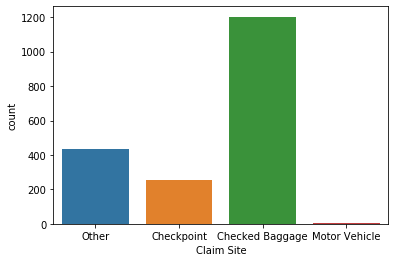

In [101]:
sns.countplot(tsa[tsa['Claim Type'].isna()]['Claim Site'])

In [102]:
tsa[tsa['Claim Type'].isna()]['Disposition'].value_counts()

Deny               519
Settle             514
Approve in Full    427
Name: Disposition, dtype: int64

In [103]:
tsa[tsa['Claim Type'].isna()]['Status'].value_counts()

Denied                                                                                                                           519
Settled                                                                                                                          514
Approved                                                                                                                         427
Canceled                                                                                                                         285
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.    206
Deny                                                                                                                              11
Closed as a contractor claim                                                                                                       6
Settle                                                               

In [104]:
tsa[tsa['Claim Type'].isna()]['Airline Name'].value_counts()

American Airlines                      166
Delta Air Lines                        161
UAL                                    122
USAir                                   89
Northwest Airlines                      89
Southwest Airlines                      89
Continental Airlines                    78
Alaska Airlines                         34
Jet Blue                                32
America West                            24
AirTran Airlines                        16
Spirit Airlines                         15
Frontier Airlines                       10
British Airways                          9
UAL                                      7
American Airlines                        6
USAir                                    6
America Trans Air                        6
Air Canada                               6
Aloha Airlines                           5
Air France                               4
Lufthansa                                4
Delta Air Lines                          4
Southwest A

In [105]:
tsa[tsa['Claim Type'].isna()]['Airport Name'].value_counts()

Los Angeles International Airport            99
Newark International Airport                 71
Miami International Airport                  65
Chicago O'Hare International Airport         60
John F. Kennedy International                53
                                             ..
Dallas-Fort Worth International Airport       1
Yellowstone                                   1
Eugene Airport/Mahlon Sweet Field             1
Newport News / Williamsburg International     1
James M. Cox Dayton International             1
Name: Airport Name, Length: 154, dtype: int64

In [106]:
tsa[tsa['Airport Name']=='Los Angeles International Airport']['Claim Type'].value_counts()

Passenger Property Loss    1090
Property Damage             602
Personal Injury               8
Passenger Theft               6
Employee Loss (MPCECA)        5
Motor Vehicle                 3
Name: Claim Type, dtype: int64

## Answer #3-2
Missing Claim Type data mostly happen at Checked Baggage Claim Site. As mentioned before, maybe it's harder to data the checked baggage because there's so many bagagge checked at a time so that there's missing data. American Airlines and Delta Airlines are the top 2 Airline Name with the most Claim Type missing data. I believe the American Airlines and Delta Airlines are 2 of the major airline in US, so that there's too many passenger to be handled by the employee. The missing Claim Type data occured the most at Los Angeles International Airport. As the primary international airport serving Los Angeles, California, and other metropolitan area, it's the world's fourth busiest airport in the world. Again, maybe the system in the airport is not good enough so that there's many not recorded datas.

In [107]:
tsa['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Closed as a contractor claim', 'In review', 'Claim entered',
       'Deny', nan, 'Settle', 'Approve in Full'], dtype=object)

In [108]:
tsa['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

In [109]:
tsa[['Status','Disposition','Claim Amount', 'Close Amount']]

,Status,Disposition,Claim Amount,Close Amount
0,Approved,Approve in Full,50.00,50.0
1,Canceled,NaN,2270.09,NaN
2,Denied,Deny,200.00,0.0
3,Approved,Approve in Full,21.44,21.0
4,Canceled,NaN,1832.22,0.0
...,...,...,...,...
51061,NaN,NaN,NaN,NaN
51062,NaN,NaN,NaN,NaN
51063,NaN,NaN,NaN,NaN
51064,NaN,NaN,NaN,NaN


In [110]:
tsa[tsa['Disposition']=='Approve in Full'][['Status','Disposition','Claim Amount', 'Close Amount']]

,Status,Disposition,Claim Amount,Close Amount
0,Approved,Approve in Full,50.00,50.00
3,Approved,Approve in Full,21.44,21.00
6,Approved,Approve in Full,678.00,678.00
10,Approved,Approve in Full,26.00,26.00
14,Approved,Approve in Full,342.36,237.00
...,...,...,...,...
36220,Approved,Approve in Full,689.42,689.42
36221,Approved,Approve in Full,9.98,9.98
36222,Approved,Approve in Full,37.82,37.82
36223,Approved,Approve in Full,64.00,64.00


In [111]:
tsa[tsa['Disposition']=='Approve in Full']['Status'].value_counts()

Approved                                                                                                                         8724
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.       1
In litigation                                                                                                                       1
Canceled                                                                                                                            1
Name: Status, dtype: int64

In [112]:
tsa[(tsa['Disposition']=='Approve in Full') & (tsa['Status']=='Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.')]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
15890,2005051784854,2005-05-16,2005-01-13,DCA,Ronald Reagan Washington National Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,12.33,Insufficient; one of the following items requi...,NaN,Approve in Full,123.0,NaN


In [113]:
tsa[tsa['Disposition']=='Deny']['Status'].value_counts()

Denied                                                                                                                           17125
In litigation                                                                                                                       15
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.        4
Canceled                                                                                                                             2
In review                                                                                                                            1
Name: Status, dtype: int64

In [114]:
tsa[(tsa['Disposition']=='Deny') & (tsa['Status']=='In litigation')]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
3860,1217801M,2003-09-09,2003-02-28 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Personal Injury,Checkpoint,NaN,2000000.00,In litigation,NaN,Deny,193.0,NaN
8724,2004061756090,2004-05-13,2003-10-05 00:00:00,TPA,Tampa International,NaN,Personal Injury,Checkpoint,NaN,200000.00,In litigation,NaN,Deny,221.0,NaN
10091,2004082661377,2004-07-23,2004-06-13 00:00:00,F,Foreign airport,Northwest Airlines,Employee Loss (MPCECA),Checked Baggage,Other,1105.00,In litigation,NaN,Deny,40.0,NaN
11219,2004110466370,2004-09-17,2004-09-24 00:00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checked Baggage,Cameras - Digital,8482.00,In litigation,NaN,Deny,-7.0,NaN
13121,2005010572864,2004-12-27,2004-10-30 00:00:00,EWN,Craven County Regional,Mountain Air Express Inc,Property Damage,Checked Baggage,Computer - Laptop,6200.00,In litigation,NaN,Deny,58.0,NaN
14447,2005031878785,2005-03-02,2005-02-10 00:00:00,SAN,San Diego International,America West,Property Damage,Checked Baggage,Other,815.00,In litigation,NaN,Deny,20.0,NaN
22010,2006011299450,2006-07-05,2004-07-03 10:15:00,ORD,Chicago O'Hare International Airport,American Airlines,Personal Injury,Checkpoint,NaN,5000000.00,In litigation,NaN,Deny,731.0,NaN
25411,2007032622957,2007-03-19,2006-11-28 00:00:00,BOS,Boston (Logan) International Airport,Northwest Airlines,Personal Injury,Checkpoint,NaN,49258.10,In litigation,NaN,Deny,111.0,NaN
26976,2007072529032,2007-07-23,2006-12-23 00:00:00,MSY,New Orleans International,Jet Blue,Personal Injury,Checkpoint,Other,12000.00,In litigation,NaN,Deny,212.0,NaN
27696,2007092032358,2007-09-13,2007-03-26 00:00:00,FNT,Bishop International; Flint,NaN,Personal Injury,Other,NaN,10000000.00,In litigation,NaN,Deny,171.0,NaN


In [115]:
tsa[(tsa['Disposition']=='Deny') & (tsa['Status']=='Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.')]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
10161,2004083061591,2004-07-27,2004-07-07,NaN,NaN,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,Insufficient; one of the following items requi...,NaN,Deny,20.0,NaN
11274,2004101965277,2004-09-20,2004-08-23,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Other,15.0,Insufficient; one of the following items requi...,NaN,Deny,28.0,NaN
13460,2005012874753,2005-01-11,2004-12-26,NaN,NaN,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),50.0,Insufficient; one of the following items requi...,NaN,Deny,16.0,NaN
14201,2005031277985,2005-02-11,NaT,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Cameras - Digital,NaN,Insufficient; one of the following items requi...,NaN,Deny,NaN,NaN


In [116]:
tsa[tsa['Disposition']=='Settle']['Status'].value_counts()

Settled     6970
Canceled       2
Name: Status, dtype: int64

In [117]:
tsa[(tsa['Disposition']=='Settle') & (tsa['Status']=='Settled')]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
7,16961,2002-09-18,2002-08-05 00:00:00,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44.0,3.01
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
30,19674,2002-10-29,2002-10-15 00:00:00,CMH,Port Columbus International,American Airlines,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,97.00,Settled,35.00,Settle,14.0,62.00
36,19158,2002-11-01,2002-09-18 00:00:00,SEA,Seattle-Tacoma International,Alaska Airlines,NaN,Checkpoint,Other,117.94,Settled,75.00,Settle,44.0,42.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36242,2010010567193,2009-12-30,2009-11-16 00:00:00,LAX,Los Angeles International Airport,UAL,Property Damage,Checked Baggage,Other,85.00,Settled,42.50,Settle,44.0,42.50
36243,2010010667221,2009-12-30,2009-12-01 16:40:00,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settled,72.00,Settle,28.0,8.00
36244,2010010867347,2009-12-30,2009-11-02 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,546.95,Settled,514.73,Settle,58.0,32.22
36245,2010010867360,2009-12-30,2009-12-14 08:30:00,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,185.00,Settled,179.23,Settle,15.0,5.77


In [118]:
tsa.groupby('Status')['Disposition'].count()

Status
Approve in Full                                                                                                                      0
Approved                                                                                                                          8724
Canceled                                                                                                                             5
Claim entered                                                                                                                        0
Closed as a contractor claim                                                                                                         0
Denied                                                                                                                           17125
Deny                                                                                                                                 0
In litigation                                   

In [119]:
tsa[tsa['Disposition'].isna()]['Close Amount'].value_counts()

0.00        1320
77000.00       1
600.00         1
24.95          1
20.00          1
35.00          1
54.91          1
1638.36        1
2600.00        1
125.00         1
66.90          1
78.06          1
100.00         1
Name: Close Amount, dtype: int64

In [120]:
tsa[tsa['Disposition'].isna()]['Status'].value_counts()

Deny                                                                                                                             7010
Approve in Full                                                                                                                  3165
Canceled                                                                                                                         1703
Settle                                                                                                                           1453
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.    1352
Closed as a contractor claim                                                                                                      326
In litigation                                                                                                                       9
Denied                                                        

In [121]:
tsa[tsa['Status']=='Denied']['Disposition'].value_counts()

Deny    17125
Name: Disposition, dtype: int64

In [122]:
len(tsa[tsa['Disposition']=='Deny'])

17147

In [123]:
tsa[tsa['Disposition']=='Deny']['Airport Name'].value_counts()

Los Angeles International Airport       874
John F. Kennedy International           802
Chicago O'Hare International Airport    628
Newark International Airport            617
Miami International Airport             593
                                       ... 
Brainerd; MN                              1
Worcester Regional                        1
Hays Regional                             1
Fort Dodge Municipal Airport              1
Dubuque Regional                          1
Name: Airport Name, Length: 327, dtype: int64

In [124]:
len(tsa[tsa['Disposition']=='Approve in Full'])

8727

In [125]:
tsa[tsa['Disposition']=='Approve in Full']['Airport Name'].value_counts()

Los Angeles International Airport           351
Chicago O'Hare International Airport        309
Seattle-Tacoma International                306
Newark International Airport                282
Phoenix Sky Harbor International            257
                                           ... 
Rafael Hernandez                              1
Sheridan County                               1
Grand Forks - Mark Andrews International      1
Unalaska-Dutch Harbor                         1
Lewiston Nez-Perce County Regional            1
Name: Airport Name, Length: 275, dtype: int64

In [126]:
tsa[(tsa['Disposition']=='Approve in Full') & (tsa['Status']=='Denied')]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences


In [127]:
tsa[(tsa['Disposition']=='Deny') & (tsa['Status']=='Approve in Full')]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences


## Answer #4
There is relation between 2 of the columns. For me, disposition is like the end result of the process and status is like the not updated version of the claim process. There's many category in status such as deny and denied that has the same meaning but different writings. 


My interpretation (for disposition):

- Approve in Full = The Claim Amount is granted fully for the passenger
- Deny = The Claim is denied. The passenger doesn't get any money
- Settle = The Claim is approved but not in full (there's differences between Claim Amount and Close Amount)
- nan = Missing data mostly because the claim is denied, canceled, or in process


I think it's more reliable to use the dispostion columns that the status columns even though the status columns is more specific, but i think it's not the most updated

There's only relation between these 2 columns (disposition and status). There would be no chance that if the disposition value is 'Deny', the status value is 'Approve in Full' because it's completely the opposite. Otherwise, there also would be no chance that if the disposition value is 'Approve in Full', the status value is 'Deny'.

As mentioned on the questions before, the higher the Claim Amount on the outlier data, the higher the chance that the claim would be denied. 

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [128]:
np.random.seed(101)

In [129]:
not_out

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
5,2004050550501,2002-09-11,2002-08-05,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Passenger Property Loss,Checkpoint,Other,1200.00,Denied,NaN,Deny,37.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,NaN


In [130]:
tsa_clean = not_out.dropna().sample(1000)

In [131]:
tsa_clean

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
13486,2005013174898,2005-01-12,2004-12-20,BUF,Buffalo Niagara International,Continental Airlines,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,81.19,Approved,81.19,Approve in Full,23.0,0.0
12542,2004122770950,2004-11-22,2004-11-07,SEA,Seattle-Tacoma International,Jet Blue,Passenger Property Loss,Checkpoint,Other,350.00,Denied,0.00,Deny,15.0,350.0
28747,2007121136344,2007-12-10,2007-12-07,CRW,Yeager; Charleston,Delta Air Lines,Passenger Property Loss,Checked Baggage,Locks,10.00,Denied,0.00,Deny,3.0,10.0
16720,2005070688338,2005-07-05,2005-06-03,OKC,Will Rogers World,UAL,Passenger Property Loss,Checked Baggage,Locks,20.00,Approved,20.00,Approve in Full,32.0,0.0
26260,2007060426211,2007-05-29,2007-05-20,DFW,Dallas-Fort Worth International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Tools - Manual (not in a vehicle),44.88,Approved,44.88,Approve in Full,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,2004051050775,2004-03-11,2004-01-24,MOB,Mobile Regional,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),290.00,Settled,275.50,Settle,47.0,14.5
15081,2005040781877,2005-04-05,2005-03-08,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,64.94,Approved,64.94,Approve in Full,28.0,0.0
25137,2007022821705,2007-02-27,2007-02-17,OGG,Kahului-Maui; HI,American Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,45.00,Approved,45.00,Approve in Full,10.0,0.0
256,0616792L,2003-01-02,2002-11-28,STL,Lambert St. Louis International,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,35.0,0.0


In [132]:
tsa_clean.to_csv('tsa_claims_dashboard_ujian.csv', index = False)

Export the data to your SQL database, and try to connect the database to the dashboard

In [164]:
import mysql.connector

In [165]:
conn=mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Abcd12345!!', use_pure = True
)

cursor = conn.cursor(dictionary=True)
cursor.execute('CREATE database tsa')

DatabaseError: 1007 (HY000): Can't create database 'tsa'; database exists

In [166]:
cursor.execute('USE tsa')

In [167]:
cursor = conn.cursor(dictionary=True)
cursor.execute('SELECT * FROM tsa_claims')
result = cursor.fetchall()
df = pd.DataFrame(result)

In [168]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,2005013174898,2005-01-12 00:00:00,2004-12-20 00:00:00,BUF,Buffalo Niagara International,Continental Airlines,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,81.19,Approved,81.19,Approve in Full,23.0,0.0
1,2004122770950,2004-11-22 00:00:00,2004-11-07 00:00:00,SEA,Seattle-Tacoma International,Jet Blue,Passenger Property Loss,Checkpoint,Other,350.00,Denied,0.00,Deny,15.0,350.0
2,2007121136344,2007-12-10 00:00:00,2007-12-07 00:00:00,CRW,Yeager; Charleston,Delta Air Lines,Passenger Property Loss,Checked Baggage,Locks,10.00,Denied,0.00,Deny,3.0,10.0
3,2005070688338,2005-07-05 00:00:00,2005-06-03 00:00:00,OKC,Will Rogers World,UAL,Passenger Property Loss,Checked Baggage,Locks,20.00,Approved,20.00,Approve in Full,32.0,0.0
4,2007060426211,2007-05-29 00:00:00,2007-05-20 00:00:00,DFW,Dallas-Fort Worth International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Tools - Manual (not in a vehicle),44.88,Approved,44.88,Approve in Full,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,2009112465670,2009-11-12 00:00:00,2009-10-27 10:30:00,CMH,Port Columbus International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Flashlights,25.00,Denied,0.00,Deny,15.0,25.0
882,2007072729177,2007-07-24 00:00:00,2007-07-20 00:00:00,JAX,Jacksonville International,Southwest Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),30.74,Approved,30.74,Approve in Full,4.0,0.0
883,2004051050775,2004-03-11 00:00:00,2004-01-24 00:00:00,MOB,Mobile Regional,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),290.00,Settled,275.50,Settle,47.0,14.5
884,2005040781877,2005-04-05 00:00:00,2005-03-08 00:00:00,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,64.94,Approved,64.94,Approve in Full,28.0,0.0


In [169]:
conn.close()